# Decision Trees
## Non-parametric supervised* learning method used to classification and regression, goal is to create a model that predicts the value of target variable by learning simple decision rules.

## <u>_*Trivia: What's the difference between supervised and un-supervised learning?_</u>
#### __Supervised__: _When you guide your machine and algorithm to reach a desired result with the help of lablled data, for e.g. in the case of classification and Regression you provide a target variable to train the model._
#### __Un-Supervised__: _When you don't know the target variable, you ask machine to infer the pattern by itself_.
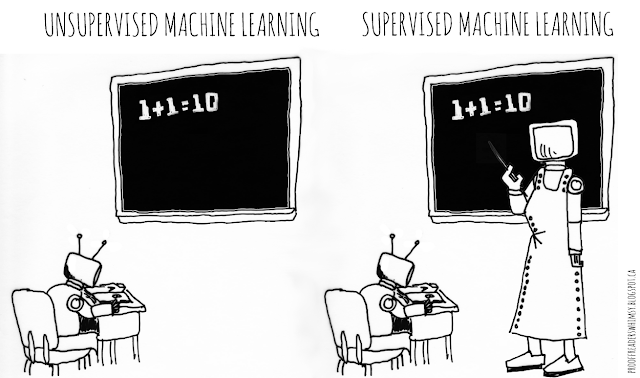

<b>

### A simple example of decision tree
<img src="https://i.vas3k.ru/7w3.jpg" alt="Drawing" style="width: 400px;"/>


### Few Advantages of Decision tree

- __Easy to understand__, interpret and visualise
- Requires __little or no data preperation__
- Able to handle multiple-output problems
- Uses __Whitebox model__ which is __easily explained by boolean logic__, either yes or no. In contrast to black box model in CNN and ANN
- Possible and __easy to validate__ using statistical Tests

<b>

Trivia: They form the backbone of most of the best performing models in the industry like XGboost and Lightgbm


<b>

## What are all the various decision tree algorithms and how do they differ from each other?:
- __ID3 (Iterative Decotomizer)__:ID3 is an algorithm invented by Ross Quinlan used to generate a decision tree from a dataset. ID3 is the precursor to the C4.5 algorithm

- __C4.5__: C4.5 builds decision trees from a set of training data in the same way as ID3, using the concept of information entropy. The training data is a set S= S1,S2,S3...of already classified samples. Each sample Si consists of a p-dimensional vector (x1,x2,x3,...xpi) where the  represent attribute values or features of the sample, as well as the class in which Si falls.
___Improvement in C4.5 from ID3: Handling both continuous and discrete attributes - In order to handle continuous attributes, C4.5 creates a threshold and then splits the list into those whose attribute value is above the threshold and those that are less than or equal to it___

- __C5.0__: The C5.0 algorithm has become the industry standatd for producing decision trees, because it does well fo rmost types of problems directly out of the box. Compared to more advanced and sophisticated machine learning mnodels (e.g. Neural Networks and Support Vector Machines), the decision trees under the C5.0 algorithm generally perform nearly as well but are much easier to understan and deploy.

- __CART__: (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

___scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.___

### Mathematical Formulation: 
#### Given training vectors $ x_i \in R^n $ i=1,…, l and a label vector $y \in R^l$ a decision tree recursively partitions the space such that the samples with the same labels are grouped together.
#### Let the data at node $m$ be represented by $Q$. For each candidate split $\theta = (j, t_m)$ consisting of a feature $j$ and threshold $ t_m$, partition the data into $ Q_{left}(\theta) $ & $Q_{right}(\theta)$

$$  \begin{align}\begin{aligned}Q_{left}(\theta) = {(x, y) | x_j <= t_m}\\Q_{right}(\theta) = Q \setminus Q_{left}(\theta)\end{aligned}\end{align} $$
 The impurity at $m$ is computed using an impurity function $H()$ , the choice of which depends on the task being solved (classification or regression)

$$ G(Q, \theta) = \frac{n_{left}}{N_m} H(Q_{left}(\theta))
+ \frac{n_{right}}{N_m} H(Q_{right}(\theta)) $$

Select the parameters that minimises the impurity
$$ \theta^* = \operatorname{argmin}_\theta  G(Q, \theta) $$

Recurse for subsets $Q_{left}(\theta^*)$ and $Q_{right}(\theta^*)$ until the maximum allowable depth is reached, $N_m < \min_{samples}$ or $N_m = 1$



# There are three main splitting criteria used in decision trees

## 1. Gini Impurity

### _Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset._

<b>

## $$ Ig(n) = 1-  \sum_{i=1}^{J} ( p_i)^2 $$

$$ J = Number of classes present in the node $$

$$ p = Distribution of class in the model $$

# Node A
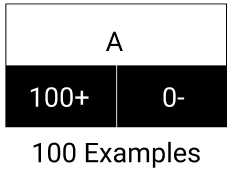
# $ Ig = 1-(1)^2 $
# _$ Ig = 0 $_ 

# Node B
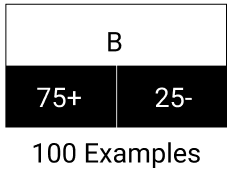
# $ Ig = 1-[(0.75)^2-(0.25)^2] $
# _$ Ig = 0.375 $_ 

# Node C
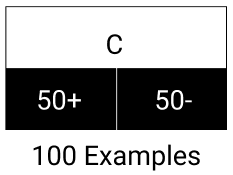
# $ Ig = 1-[(0.5)^2-(0.5)^2] $
# _$ Ig = 0.5 $_ 

#### Node D
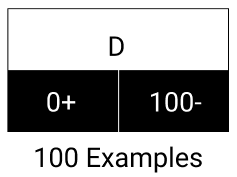
# $ Ig = 1-[(0)^2-(1)^2] $
# _$ Ig = 0 $_ 

## Hence Gini Impurity is Max in Node D i.e. 0.5 and Min. for Node A&D i.e. 0


# <u> We choose the node with minimum Gini Impurity </u>


<b>

## 2. Entropy: It is the measure of randomness in the system

# $$ Entropy =  \sum_{i=1}^{J} -p  \times  \log_{2} (pi) $$ 

### Where:

_J = Number of classes present in the node_

_p = Distribution of class in the model_

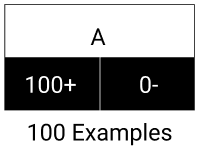

##  $E = 1 \times  \log_{2} 1- 0 \times  \log_{2} 0 $
##  $E = 0$

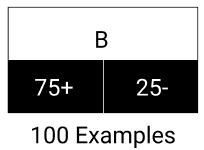
##  $E = 0.75 \times  \log_{2} (0.75)- (0.25) \times  \log_{2} (0.25) $
##  $E = 0.81$

## 3. Variance: 

### _While doing Classification we can use Gini Impurities and Entropy but as far as Regression is concerned we need to use Variance. In Regression most common split is measured with the weighted variance of the node, because we want minimum variation in the nodes after the split_



# $$ Variance =  (\sum (x- \overline{x})^2) /x $$

## Let's take a case study where we have to predict the salary of an employ on the basis of various criteria

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## importing the Dataset

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Training the Decision Tree Regression model on the whole dataset

In [6]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting a new result

In [7]:
regressor.predict([[6.5]])

array([150000.])

## Visualising the Decision Tree Regression Result

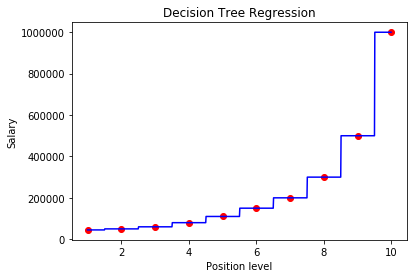

In [9]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# _“The possible solutions to a given problem emerge as the leaves of a tree, each node representing a point of deliberation and decision.”_
### $$ -Niklaus Wirth (1934 — ) $$